# Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score , r2_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import joblib

# Loading Dataset

In [2]:
sepsis_prediction_dataset = pd.read_csv("sepsis_prediction_dataset.csv")

In [35]:
sepsis_prediction_dataset.head(5)

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,hospital_expire_flag,hospital_stay_hours,...,Platelet Count,White Blood Cells,Blood Pressure,Brain,GCS,Glucose,Heart Rate,Oxygen,Respiratory,Temperature
0,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,0,53.333333,...,94.500000,4.450000,68.433333,25.07069,4.888889,115.000000,94.642857,1.0,20.700000,98.966667
1,10000690,25860671,2150-11-02 18:02:00,2150-11-12 13:45:00,EW EMER.,EMERGENCY ROOM,REHAB,Medicare,0,235.716667,...,242.200000,5.730000,86.063830,25.07069,4.694444,100.333333,84.190909,1.0,22.557895,97.736364
2,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,0,139.366667,...,204.333333,5.166667,107.757576,25.07069,5.000000,109.500000,73.636364,1.0,21.538462,98.133333
3,10001217,24597018,2157-11-18 22:56:00,2157-11-25 18:00:00,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,Private,0,163.066667,...,349.333333,13.150000,103.837500,25.07069,5.000000,113.000000,92.696970,1.0,21.259259,99.066667
4,10001217,27703517,2157-12-18 16:58:00,2157-12-24 14:55:00,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Private,0,141.950000,...,319.800000,7.640000,90.855072,25.07069,5.000000,129.000000,81.612903,1.0,16.640000,98.133333


# Dataset Info and Null values

In [37]:
sepsis_prediction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112349 entries, 0 to 112348
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            112349 non-null  int64  
 1   hadm_id               112349 non-null  int64  
 2   admittime             112349 non-null  object 
 3   dischtime             112349 non-null  object 
 4   admission_type        112349 non-null  object 
 5   admission_location    112349 non-null  object 
 6   discharge_location    112349 non-null  object 
 7   insurance             112349 non-null  object 
 8   hospital_expire_flag  112349 non-null  int64  
 9   hospital_stay_hours   112349 non-null  float64
 10  gender                112349 non-null  object 
 11  anchor_age            112349 non-null  int64  
 12  stay_id               112349 non-null  float64
 13  first_careunit        112349 non-null  object 
 14  last_careunit         112349 non-null  object 
 15  

In [61]:
sepsis_prediction_dataset.describe().style.background_gradient(cmap='Set2')

,subject_id,hadm_id,hospital_expire_flag,hospital_stay_hours,anchor_age,stay_id,los,icu_stay_hours,sepsis,Bicarbonate,C-Reactive Protein,Creatinine,Lactate,Platelet Count,White Blood Cells,Blood Pressure,Brain,GCS,Glucose,Heart Rate,Oxygen,Respiratory,Temperature
count,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000,112349.000000
mean,15005078.665818,24987745.602533,0.149694,316.766422,63.363724,34997017.676828,4.090014,98.160335,0.321828,24.519531,45.255440,1.425484,5.828052,219.059110,11.070493,91.850913,25.072909,4.226854,215.895541,88.410411,1.006626,19.518797,92.652200
std,2881880.341325,2881917.016591,0.356773,423.369324,16.496455,2884400.487344,6.216241,149.189787,0.467179,4.042517,28.917730,1.389307,1269.050361,108.927395,7.711012,497.662637,0.894539,0.938375,2978.503744,281.486396,0.156594,86.736371,22.801224
min,10000032.000000,20000094.000000,0.000000,0.150000,18.000000,30000153.000000,0.001250,0.030000,0.000000,4.000000,0.100000,0.000000,0.200000,5.555556,0.100000,31.888889,1.000000,0.000000,15.000000,-417.044211,0.000000,4.500000,18.425000
25%,12515572.000000,22489381.000000,0.000000,108.566667,53.000000,32507641.000000,1.152083,27.650000,0.000000,22.333333,39.600000,0.716667,1.450000,148.600000,7.583333,79.987179,25.070690,3.751938,112.500000,77.414035,1.000000,16.578158,97.600000
50%,15006102.000000,24997664.000000,0.000000,189.866667,65.000000,35000384.000000,2.096644,50.319444,0.000000,24.500000,39.600000,0.960000,1.600000,204.142857,10.000000,86.212121,25.070690,4.607143,129.451613,85.263158,1.000000,18.651515,98.176190
75%,17513167.000000,27467583.000000,0.000000,366.450000,76.000000,37484755.000000,4.255417,102.130000,1.000000,26.692308,39.600000,1.509091,2.141176,271.666667,13.035294,94.284314,25.070690,4.986111,157.000000,94.034884,1.000000,21.139535,98.585714
max,19999987.000000,29999828.000000,1.000000,12373.500000,91.000000,39999858.000000,226.403079,5433.673889,1.000000,49.500000,576.200000,26.572727,425368.400000,2088.888889,471.700000,88328.470588,229.000000,6.000000,333402.666667,90182.171171,4.000000,22821.951140,4035.698305


In [62]:
sepsis_prediction_dataset.isnull().sum()

subject_id              0
hadm_id                 0
admittime               0
dischtime               0
admission_type          0
admission_location      0
discharge_location      0
insurance               0
hospital_expire_flag    0
hospital_stay_hours     0
gender                  0
anchor_age              0
stay_id                 0
first_careunit          0
last_careunit           0
intime                  0
outtime                 0
los                     0
icu_stay_hours          0
sepsis                  0
Bicarbonate             0
C-Reactive Protein      0
Creatinine              0
Lactate                 0
Platelet Count          0
White Blood Cells       0
Blood Pressure          0
Brain                   0
GCS                     0
Glucose                 0
Heart Rate              0
Oxygen                  0
Respiratory             0
Temperature             0
dtype: int64

In [64]:
sepsis_prediction_dataset.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type',
       'admission_location', 'discharge_location', 'insurance',
       'hospital_expire_flag', 'hospital_stay_hours', 'gender', 'anchor_age',
       'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime',
       'los', 'icu_stay_hours', 'sepsis', 'Bicarbonate', 'C-Reactive Protein',
       'Creatinine', 'Lactate', 'Platelet Count', 'White Blood Cells',
       'Blood Pressure', 'Brain', 'GCS', 'Glucose', 'Heart Rate', 'Oxygen',
       'Respiratory', 'Temperature'],
      dtype='object')

In [65]:
sepsis_prediction_dataset.dtypes

subject_id                int64
hadm_id                   int64
admittime                object
dischtime                object
admission_type           object
admission_location       object
discharge_location       object
insurance                object
hospital_expire_flag      int64
hospital_stay_hours     float64
gender                   object
anchor_age                int64
stay_id                 float64
first_careunit           object
last_careunit            object
intime                   object
outtime                  object
los                     float64
icu_stay_hours          float64
sepsis                  float64
Bicarbonate             float64
C-Reactive Protein      float64
Creatinine              float64
Lactate                 float64
Platelet Count          float64
White Blood Cells       float64
Blood Pressure          float64
Brain                   float64
GCS                     float64
Glucose                 float64
Heart Rate              float64
Oxygen  

In [66]:
sepsis_prediction_dataset['gender'].value_counts()

gender
M    62942
F    49407
Name: count, dtype: int64

In [70]:
sepsis_prediction_dataset.groupby('gender')['sepsis'].sum()

gender
F    15888.0
M    20269.0
Name: sepsis, dtype: float64

In [71]:
sepsis_prediction_dataset['sepsis'].value_counts()

sepsis
0.0    76192
1.0    36157
Name: count, dtype: int64

# Data Preprocessing

In [75]:
for i in sepsis_prediction_dataset.select_dtypes(include='object').columns:
    display(Markdown(f"**{i}**"))
    unique_values = sepsis_prediction_dataset[i].unique()
    print(unique_values)
    print("-" * 50)

**admittime**

['2180-07-23 12:35:00' '2150-11-02 18:02:00' '2189-06-27 07:38:00' ...
 '2149-01-08 16:44:00' '2164-09-10 13:47:00' '2145-11-02 21:38:00']
--------------------------------------------------


**dischtime**

['2180-07-25 17:55:00' '2150-11-12 13:45:00' '2189-07-03 03:00:00' ...
 '2149-01-18 17:00:00' '2164-09-17 13:42:00' '2145-11-11 12:57:00']
--------------------------------------------------


**admission_type**

['EW EMER.' 'DIRECT EMER.' 'URGENT' 'OBSERVATION ADMIT'
 'SURGICAL SAME DAY ADMISSION' 'ELECTIVE' 'DIRECT OBSERVATION'
 'EU OBSERVATION' 'AMBULATORY OBSERVATION']
--------------------------------------------------


**admission_location**

['EMERGENCY ROOM' 'PHYSICIAN REFERRAL' 'PACU' 'TRANSFER FROM HOSPITAL'
 'PROCEDURE SITE' 'TRANSFER FROM SKILLED NURSING FACILITY'
 'WALK-IN/SELF REFERRAL' 'INFORMATION NOT AVAILABLE' 'CLINIC REFERRAL'
 'AMBULATORY SURGERY TRANSFER' 'INTERNAL TRANSFER TO OR FROM PSYCH']
--------------------------------------------------


**discharge_location**

['HOME' 'REHAB' 'HOME HEALTH CARE' 'DIED' 'CHRONIC/LONG TERM ACUTE CARE'
 'SKILLED NURSING FACILITY' 'PSYCH FACILITY' 'ACUTE HOSPITAL'
 'OTHER FACILITY' 'HOSPICE' 'AGAINST ADVICE' 'ASSISTED LIVING'
 'HEALTHCARE FACILITY']
--------------------------------------------------


**insurance**

['Medicaid' 'Medicare' 'Private' 'Other' 'No charge']
--------------------------------------------------


**gender**

['F' 'M']
--------------------------------------------------


**first_careunit**

['Medical Intensive Care Unit (MICU)'
 'Surgical Intensive Care Unit (SICU)'
 'Medical/Surgical Intensive Care Unit (MICU/SICU)'
 'Cardiac Vascular Intensive Care Unit (CVICU)' 'Coronary Care Unit (CCU)'
 'Neuro Intermediate' 'Trauma SICU (TSICU)' 'Neuro Stepdown'
 'Neuro Surgical Intensive Care Unit (Neuro SICU)'
 'Surgery/Vascular/Intermediate' 'Intensive Care Unit (ICU)' 'PACU'
 'Medicine' 'Surgery/Trauma' 'Medicine/Cardiology Intermediate' 'Med/Surg'
 'Neurology']
--------------------------------------------------


**last_careunit**

['Medical Intensive Care Unit (MICU)'
 'Surgical Intensive Care Unit (SICU)'
 'Medical/Surgical Intensive Care Unit (MICU/SICU)'
 'Cardiac Vascular Intensive Care Unit (CVICU)' 'Coronary Care Unit (CCU)'
 'Neuro Intermediate' 'Trauma SICU (TSICU)' 'Neuro Stepdown'
 'Neuro Surgical Intensive Care Unit (Neuro SICU)'
 'Surgery/Vascular/Intermediate' 'Intensive Care Unit (ICU)' 'PACU'
 'Medicine' 'Surgery/Trauma' 'Medicine/Cardiology Intermediate' 'Med/Surg'
 'Neurology']
--------------------------------------------------


**intime**

['2180-07-23 14:00:00' '2150-11-02 19:37:00' '2189-06-27 08:42:00' ...
 '2149-01-08 18:12:00' '2164-09-12 09:26:28' '2145-11-02 22:59:00']
--------------------------------------------------


**outtime**

['2180-07-23 23:50:47' '2150-11-06 17:03:17' '2189-06-27 20:38:27' ...
 '2149-01-10 13:11:02' '2164-09-17 16:35:15' '2145-11-04 21:29:30']
--------------------------------------------------


In [3]:
sepsis_prediction_dataset = sepsis_prediction_dataset.drop(['subject_id', 'hadm_id','stay_id', 'admittime', 'dischtime', 'intime','discharge_location', 'outtime'],axis=1)

In [4]:
sepsis_prediction_dataset['gender'] = sepsis_prediction_dataset['gender'].map({'M': 0, 'F': 1})
sepsis_prediction_dataset['gender'].value_counts()

gender
0    62942
1    49407
Name: count, dtype: int64

In [5]:
sepsis_prediction_dataset.select_dtypes(include=['object'])

,admission_type,admission_location,insurance,first_careunit,last_careunit
0,EW EMER.,EMERGENCY ROOM,Medicaid,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
1,EW EMER.,EMERGENCY ROOM,Medicare,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
2,EW EMER.,EMERGENCY ROOM,Medicare,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
3,EW EMER.,EMERGENCY ROOM,Private,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU)
4,DIRECT EMER.,PHYSICIAN REFERRAL,Private,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU)
...,...,...,...,...,...
112344,ELECTIVE,PHYSICIAN REFERRAL,Medicaid,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU)
112345,EW EMER.,EMERGENCY ROOM,Medicare,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU)
112346,EW EMER.,TRANSFER FROM HOSPITAL,Medicaid,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
112347,EW EMER.,EMERGENCY ROOM,Private,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU)


### OneHot Encoding Features

In [6]:
onehot_features = ['admission_type', 'admission_location', 'insurance']
ohe = OneHotEncoder(sparse_output =False, drop='first')
onehot_encoded = ohe.fit_transform(sepsis_prediction_dataset[onehot_features])
onehot_columns = ohe.get_feature_names_out(onehot_features)
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_columns)
sepsis_prediction_dataset.drop(columns=onehot_features, inplace=True)
sepsis_prediction_dataset = pd.concat([sepsis_prediction_dataset, onehot_df], axis=1)
sepsis_prediction_dataset.select_dtypes(include=['object']).head(2)

,first_careunit,last_careunit
0,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)
1,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU)


### Label Encoding Features

In [7]:
label_features = ['first_careunit', 'last_careunit']
le = LabelEncoder()
for feature in label_features:
    sepsis_prediction_dataset[feature] = le.fit_transform(sepsis_prediction_dataset[feature])
sepsis_prediction_dataset.dtypes

hospital_expire_flag                                           int64
hospital_stay_hours                                          float64
gender                                                         int64
anchor_age                                                     int64
first_careunit                                                 int64
last_careunit                                                  int64
los                                                          float64
icu_stay_hours                                               float64
sepsis                                                       float64
Bicarbonate                                                  float64
C-Reactive Protein                                           float64
Creatinine                                                   float64
Lactate                                                      float64
Platelet Count                                               float64
White Blood Cells                 

### Standardization

In [8]:
scaling_columns = ['hospital_stay_hours','anchor_age', 'icu_stay_hours', 'los', 'C-Reactive Protein', 'White Blood Cells', 'Creatinine',
                     'Temperature', 'Respiratory', 'Heart Rate', 'Glucose']
scaler = StandardScaler()
sepsis_prediction_dataset[scaling_columns] = scaler.fit_transform(sepsis_prediction_dataset[scaling_columns])

In [110]:
sepsis_prediction_dataset

,hospital_expire_flag,hospital_stay_hours,gender,anchor_age,first_careunit,last_careunit,los,icu_stay_hours,sepsis,Bicarbonate,...,admission_location_PACU,admission_location_PHYSICIAN REFERRAL,admission_location_PROCEDURE SITE,admission_location_TRANSFER FROM HOSPITAL,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,insurance_Medicare,insurance_No charge,insurance_Other,insurance_Private
0,0,-0.622233,1,-0.688862,4,4,-0.591960,-0.591960,0.0,24.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.191441,1,1.372196,4,4,-0.031653,-0.031653,0.0,32.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,-0.419021,1,0.584145,4,4,-0.577921,-0.577921,0.0,23.714286,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,-0.363041,1,-0.507004,15,15,-0.478102,-0.478102,0.0,26.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,-0.412919,1,-0.507004,15,15,-0.505436,-0.505436,0.0,27.800000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112344,0,0.117275,0,-1.355674,15,15,0.460144,0.460144,0.0,25.416667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112345,0,-0.442562,0,1.069100,5,5,-0.503405,-0.503405,0.0,23.888889,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
112346,0,-0.180694,1,-1.052578,4,4,-0.369842,-0.369842,0.0,22.200000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
112347,1,-0.351585,0,-0.325145,15,15,0.194291,0.194291,0.0,26.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
correlation_matrix = sepsis_prediction_dataset.corr()
correlation_with_target = correlation_matrix['sepsis'].sort_values(ascending=False)
correlation_with_target

sepsis                                                       1.000000
hospital_expire_flag                                         0.295021
hospital_stay_hours                                          0.264294
los                                                          0.223380
icu_stay_hours                                               0.223380
C-Reactive Protein                                           0.169160
White Blood Cells                                            0.161358
Creatinine                                                   0.130231
admission_type_EW EMER.                                      0.102163
admission_location_TRANSFER FROM SKILLED NURSING FACILITY    0.068140
insurance_Medicare                                           0.064545
admission_location_TRANSFER FROM HOSPITAL                    0.058377
anchor_age                                                   0.054325
admission_type_URGENT                                        0.051905
admission_location_E

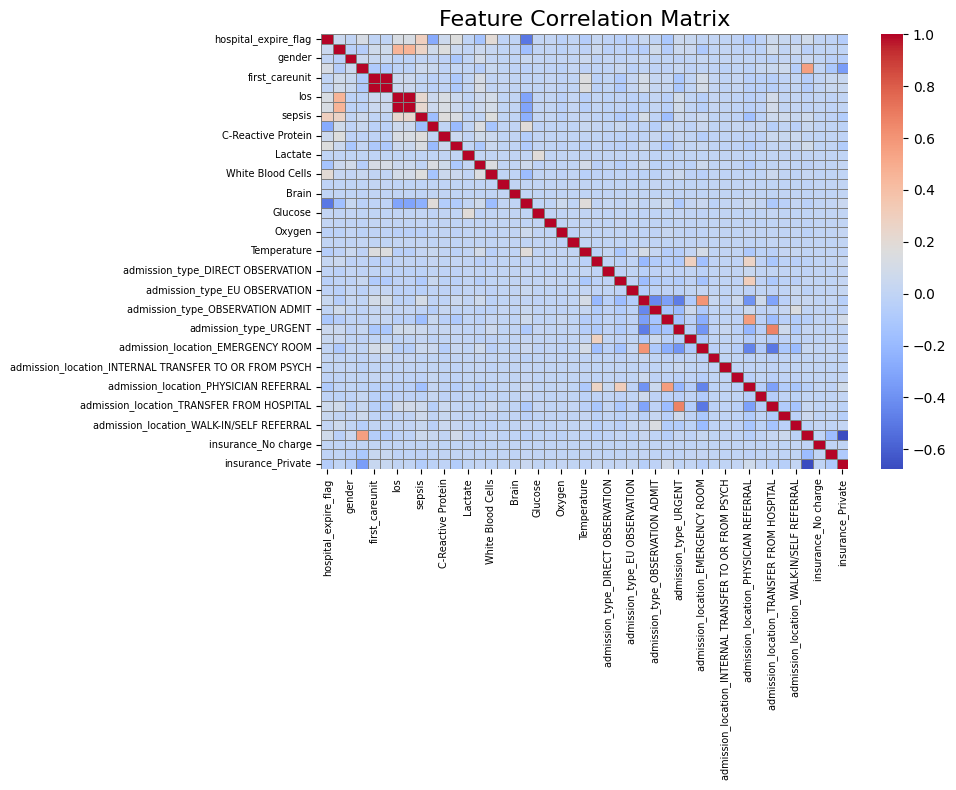

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

In [118]:
numeric_cols = sepsis_prediction_dataset.select_dtypes(include=[np.number]).columns

outliers_info = {}

for col in numeric_cols:
    Q1 = sepsis_prediction_dataset[col].quantile(0.25)
    Q3 = sepsis_prediction_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = sepsis_prediction_dataset[(sepsis_prediction_dataset[col] < lower_bound) |
                                         (sepsis_prediction_dataset[col] > upper_bound)]
    outliers_info[col] = len(outliers)

# Print how many outliers each column has
for col, count in outliers_info.items():
    print(f"Column: {col}, Number of outliers: {count}")

Column: hospital_expire_flag, Number of outliers: 16818
Column: hospital_stay_hours, Number of outliers: 9535
Column: gender, Number of outliers: 0
Column: anchor_age, Number of outliers: 144
Column: first_careunit, Number of outliers: 0
Column: last_careunit, Number of outliers: 0
Column: los, Number of outliers: 11780
Column: icu_stay_hours, Number of outliers: 11780
Column: sepsis, Number of outliers: 0
Column: Bicarbonate, Number of outliers: 5174
Column: C-Reactive Protein, Number of outliers: 12168
Column: Creatinine, Number of outliers: 11784
Column: Lactate, Number of outliers: 11074
Column: Platelet Count, Number of outliers: 3595
Column: White Blood Cells, Number of outliers: 4612
Column: Blood Pressure, Number of outliers: 2184
Column: Brain, Number of outliers: 55
Column: GCS, Number of outliers: 3941
Column: Glucose, Number of outliers: 5528
Column: Heart Rate, Number of outliers: 1385
Column: Oxygen, Number of outliers: 3926
Column: Respiratory, Number of outliers: 1777
C

In [119]:
numeric_cols = sepsis_prediction_dataset.select_dtypes(include=[np.number]).columns
z_thresh = 3 

for col in numeric_cols:
    col_zscore = np.abs(stats.zscore(sepsis_prediction_dataset[col].dropna()))
    outliers = col_zscore[col_zscore > z_thresh]
    print(f"Column: {col}, Number of outliers: {len(outliers)}")


Column: hospital_expire_flag, Number of outliers: 0
Column: hospital_stay_hours, Number of outliers: 1857
Column: gender, Number of outliers: 0
Column: anchor_age, Number of outliers: 0
Column: first_careunit, Number of outliers: 0
Column: last_careunit, Number of outliers: 0
Column: los, Number of outliers: 2318
Column: icu_stay_hours, Number of outliers: 2318
Column: sepsis, Number of outliers: 0
Column: Bicarbonate, Number of outliers: 1707
Column: C-Reactive Protein, Number of outliers: 3334
Column: Creatinine, Number of outliers: 2788
Column: Lactate, Number of outliers: 1
Column: Platelet Count, Number of outliers: 1366
Column: White Blood Cells, Number of outliers: 853
Column: Blood Pressure, Number of outliers: 18
Column: Brain, Number of outliers: 43
Column: GCS, Number of outliers: 2419
Column: Glucose, Number of outliers: 157
Column: Heart Rate, Number of outliers: 35
Column: Oxygen, Number of outliers: 3164
Column: Respiratory, Number of outliers: 5
Column: Temperature, Num

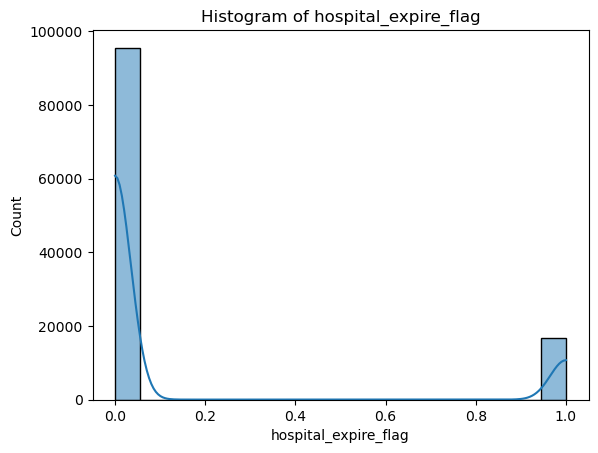

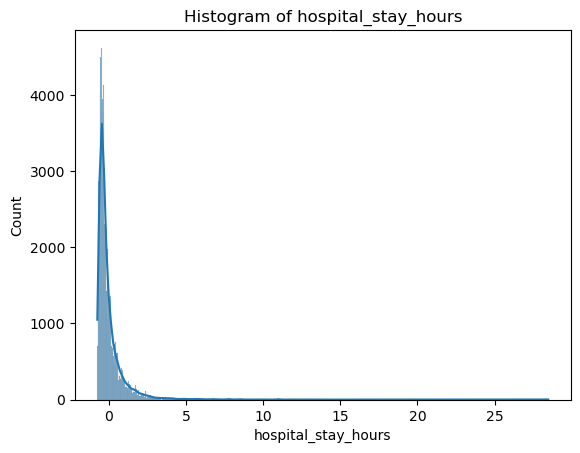

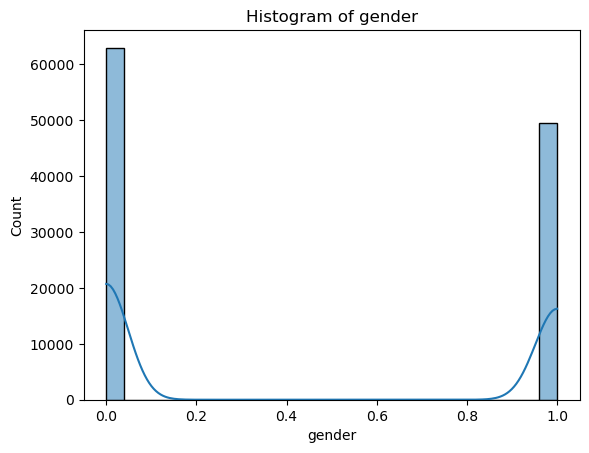

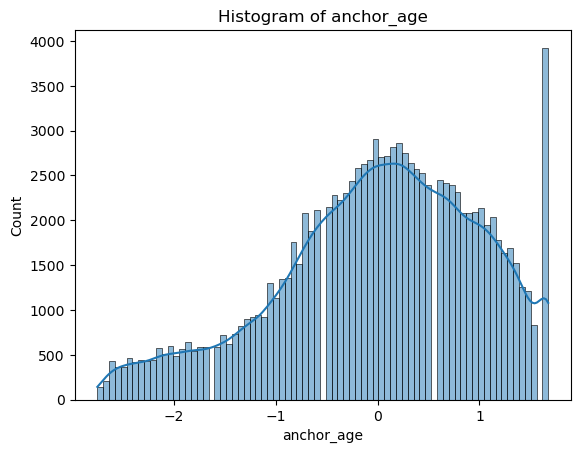

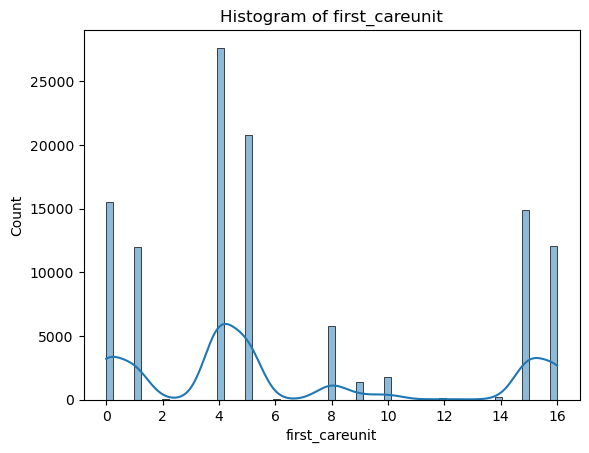

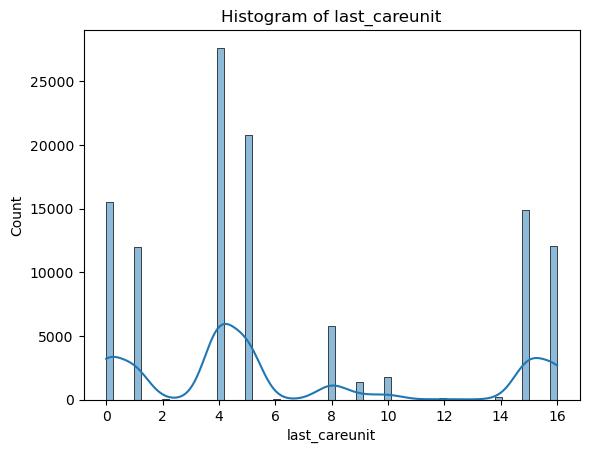

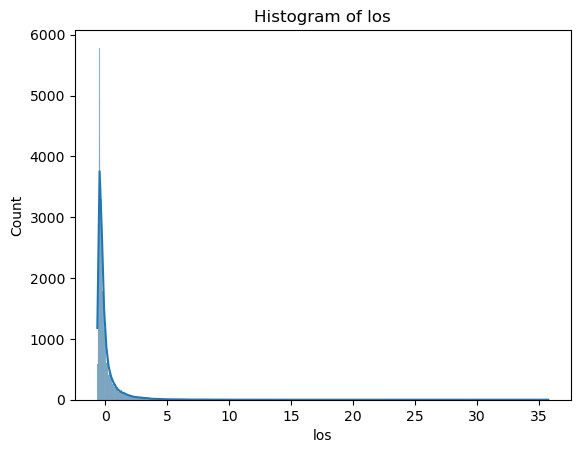

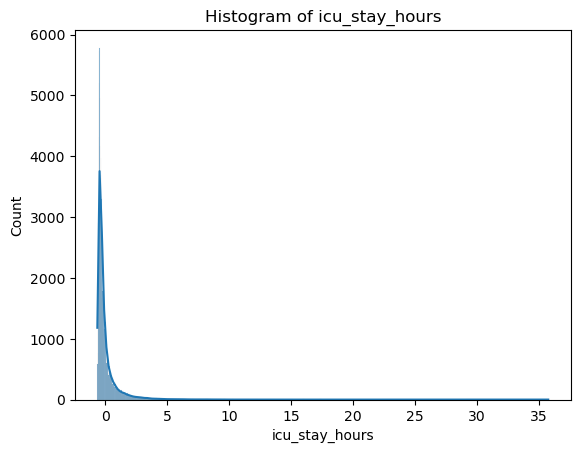

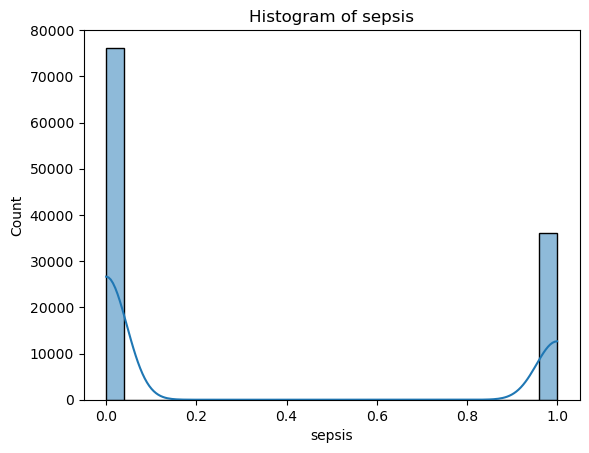

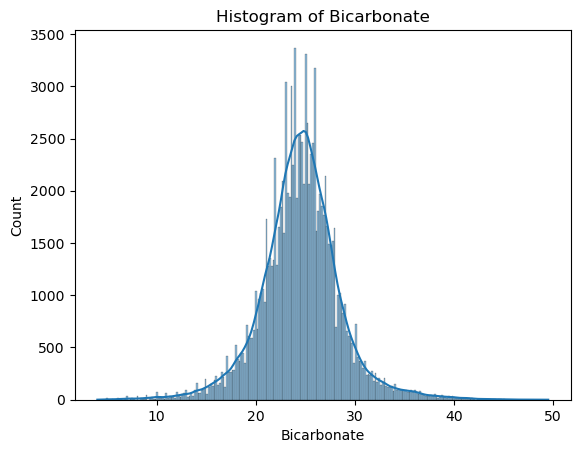

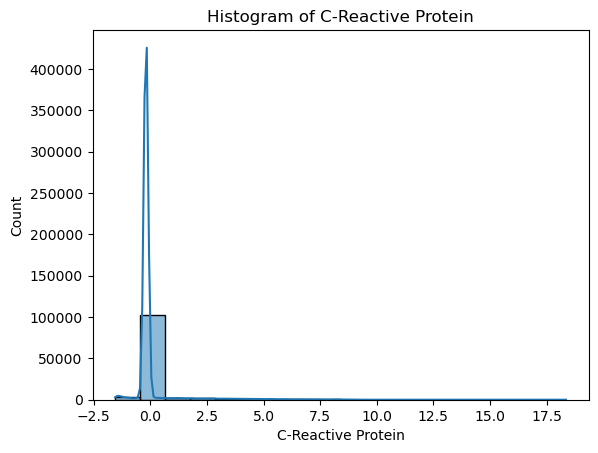

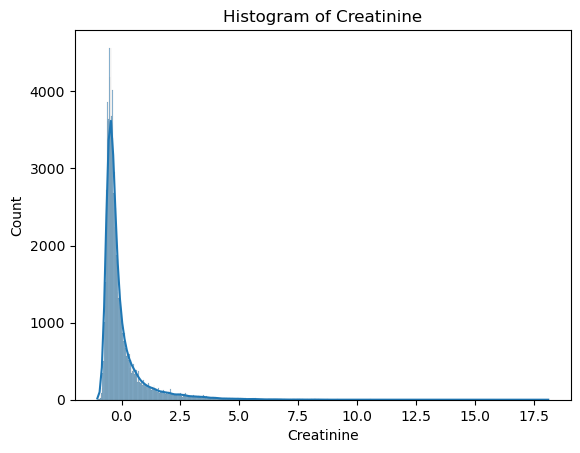

KeyboardInterrupt: 

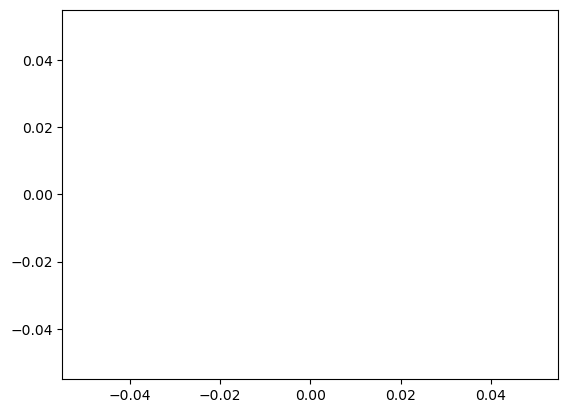

In [121]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(sepsis_prediction_dataset[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# ML Model Building

In [15]:
x = sepsis_prediction_dataset.drop(columns=['sepsis'])
y = sepsis_prediction_dataset['sepsis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [159]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [161]:
for model_name, model in models.items():
    print("--------------------------------------------------")
    print(f"\033[1m{model_name}\033[0m")
    print("--------------------------------------------------")
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC for {model_name}: {roc_auc_score(y_test, y_pred_proba):.4f}")
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()
    display(df_report.style.background_gradient(cmap='copper'))
    
    joblib.dump(model, f"sepsis_{model_name.replace(' ', '_').lower()}_model.pkl")
    print(f"Model saved as sepsis_{model_name.replace(' ', '_').lower()}_model.pkl\n")

--------------------------------------------------
Logistic Regression
--------------------------------------------------
Accuracy for Logistic Regression: 0.7588
ROC-AUC for Logistic Regression: 0.8115


,precision,recall,f1-score,support
0.0,0.772819,0.909715,0.835698,15152.000000
1.0,0.704791,0.446297,0.546519,7318.000000
accuracy,0.758789,0.758789,0.758789,0.758789
macro avg,0.738805,0.678006,0.691109,22470.000000
weighted avg,0.750664,0.758789,0.741519,22470.000000


Model saved as sepsis_logistic_regression_model.pkl

--------------------------------------------------
Random Forest
--------------------------------------------------
Accuracy for Random Forest: 0.9338
ROC-AUC for Random Forest: 0.9776


,precision,recall,f1-score,support
0.0,0.948942,0.953076,0.951004,15152.000000
1.0,0.901958,0.893823,0.897872,7318.000000
accuracy,0.933778,0.933778,0.933778,0.933778
macro avg,0.925450,0.923449,0.924438,22470.000000
weighted avg,0.933640,0.933778,0.933700,22470.000000


Model saved as sepsis_random_forest_model.pkl

--------------------------------------------------
Gradient Boosting
--------------------------------------------------
Accuracy for Gradient Boosting: 0.8154
ROC-AUC for Gradient Boosting: 0.8925


,precision,recall,f1-score,support
0.0,0.840798,0.895789,0.867423,15152.000000
1.0,0.750435,0.648811,0.695933,7318.000000
accuracy,0.815354,0.815354,0.815354,0.815354
macro avg,0.795616,0.772300,0.781678,22470.000000
weighted avg,0.811368,0.815354,0.811572,22470.000000


Model saved as sepsis_gradient_boosting_model.pkl



# Deep Learning Model

In [165]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_tensor = torch.tensor(x_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the deep learning model
class SepsisPredictionModel(nn.Module):
    def __init__(self):
        super(SepsisPredictionModel, self).__init__()
        self.fc1 = nn.Linear(x_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(torch.relu(self.fc3(x)))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the model
model = SepsisPredictionModel()

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        labels = labels.squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")


# Evaluate the model
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs).squeeze()
        predicted = (outputs > 0.5).int()
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

Epoch [1/50], Loss: 0.4517
Epoch [2/50], Loss: 0.4168
Epoch [3/50], Loss: 0.4011
Epoch [4/50], Loss: 0.3908
Epoch [5/50], Loss: 0.3833
Epoch [6/50], Loss: 0.3787
Epoch [7/50], Loss: 0.3704
Epoch [8/50], Loss: 0.3642
Epoch [9/50], Loss: 0.3559
Epoch [10/50], Loss: 0.3487
Epoch [11/50], Loss: 0.3361
Epoch [12/50], Loss: 0.3293
Epoch [13/50], Loss: 0.3206
Epoch [14/50], Loss: 0.3115
Epoch [15/50], Loss: 0.3068
Epoch [16/50], Loss: 0.2990
Epoch [17/50], Loss: 0.2910
Epoch [18/50], Loss: 0.2829
Epoch [19/50], Loss: 0.2757
Epoch [20/50], Loss: 0.2679
Epoch [21/50], Loss: 0.2628
Epoch [22/50], Loss: 0.2567
Epoch [23/50], Loss: 0.2510
Epoch [24/50], Loss: 0.2459
Epoch [25/50], Loss: 0.2407
Epoch [26/50], Loss: 0.2358
Epoch [27/50], Loss: 0.2313
Epoch [28/50], Loss: 0.2281
Epoch [29/50], Loss: 0.2238
Epoch [30/50], Loss: 0.2175
Epoch [31/50], Loss: 0.2140
Epoch [32/50], Loss: 0.2115
Epoch [33/50], Loss: 0.2069
Epoch [34/50], Loss: 0.2030
Epoch [35/50], Loss: 0.2013
Epoch [36/50], Loss: 0.1954
E

In [168]:
print("\033[1mDeep Learning Model Performance:\033[0m")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
report_deep = classification_report(y_test, y_pred, output_dict=True)
deep_report = pd.DataFrame(report_deep).transpose()
display(deep_report.style.background_gradient(cmap='copper'))

Deep Learning Model Performance:
Accuracy: 0.8637
ROC-AUC: 0.8447


,precision,recall,f1-score,support
0.0,0.898694,0.899287,0.898991,15152.000000
1.0,0.791188,0.790107,0.790647,7318.000000
accuracy,0.863729,0.863729,0.863729,0.863729
macro avg,0.844941,0.844697,0.844819,22470.000000
weighted avg,0.863682,0.863729,0.863705,22470.000000


In [169]:
torch.save(model.state_dict(), "sepsis_deep_lm.pth")